In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('loan_dataset.csv')

In [3]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


1. convert loan_status to binary
2. normalizing the data scince it has really big values

In [4]:
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x == 'Denied' else 1)
df['credit_score'] = (df['credit_score'] - df['credit_score'].min()) / (df['credit_score'].max() - df['credit_score'].min())
df['income'] = (df['income'] - df['income'].min()) / (df['income'].max() - df['income'].min())
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,0.387097,0.592593,1
1,45,Female,Teacher,Master's,Single,0.238710,0.444444,1
2,28,Male,Student,High School,Single,0.000000,0.111111,0
3,51,Female,Manager,Bachelor's,Married,0.516129,0.814815,1
4,36,Male,Accountant,Bachelor's,Married,0.322581,0.555556,1


In [5]:
x = df[['credit_score', 'income']].values

# first 20 rows of df
x20 = df[['credit_score', 'income']].head(20).values

In [6]:
def kmeans(x, k, max_iter=1):
    centroids = x[np.random.choice(range(x.shape[0]), k, replace=False)]
    for _ in range(max_iter):
        labels = np.argmin(np.linalg.norm(x[:, None] - centroids, axis=2), axis=1)
        print(centroids)
        new_centroids = np.array([x[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

In [ ]:
def kmeans(x, k, max_iter=1):
    # Initialize centroids by choosing k random data points
    # centroids = x[np.random.choice(range(x.shape[0]), k, replace=False)]
    centroids = [[0,0],[0.5,0.5],[1,1]]
    print(f"Initial centroids:\n{centroids}\n")

    for iteration in range(max_iter):
        # Calculate the distances from each point to each centroid
        distances = np.linalg.norm(x[:, None] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # printing formula for distance and data points
        print(f"Distance formula: sqrt((x1 - x2)^2 + (y1 - y2)^2)\n")
        for i in zip(x,distances):
            print(f"Distance from {i[0]} to each centroid: {i[1]}")
            

        # print(f"Data points:\n{x}\n")
        
        print(f"Iteration {iteration + 1}:")
        # print(f"Distances:\n{distances}")
        print(f"Labels (assigned cluster for each point):\n{labels}")
        
        # Calculate new centroids by taking the mean of points assigned to each cluster
        new_centroids = np.array([x[labels == i].mean(axis=0) for i in range(k)])
        
        print(f"New centroids:\n{new_centroids}\n")
        
        # Check if centroids have not changed
        if np.all(centroids == new_centroids):
            print("Centroids have not changed, stopping early.")
            break
        
        centroids = new_centroids

    return centroids, labels


Initial centroids:
[[0, 0], [0.5, 0.5], [1, 1]]

Distance formula: sqrt((x1 - x2)^2 + (y1 - y2)^2)

Distance from [0.59259259 0.38709677] to each centroid: [0.70782052 0.1460155  0.73595595]
Distance from [0.44444444 0.23870968] to each centroid: [0.50449299 0.26713115 0.94244625]
Distance from [0.11111111 0.        ] to each centroid: [0.11111111 0.63343079 1.33795495]
Distance from [0.81481481 0.51612903] to each centroid: [0.96452701 0.31522772 0.51809716]
Distance from [0.55555556 0.32258065] to each centroid: [0.6424175  0.18591409 0.81020235]
Distance from [0.2962963 0.1483871] to each centroid: [0.33137626 0.40635801 1.10473682]
Distance from [0.85185185 0.61290323] to each centroid: [1.04942934 0.36952248 0.41447773]
Distance from [0.22222222 0.08387097] to each centroid: [0.23752275 0.50032376 1.20176149]
Distance from [0.7037037  0.43225806] to each centroid: [0.82586072 0.21467224 0.640408  ]
Distance from [0.96296296 1.        ] to each centroid: [1.38827147 0.68142109 0.03

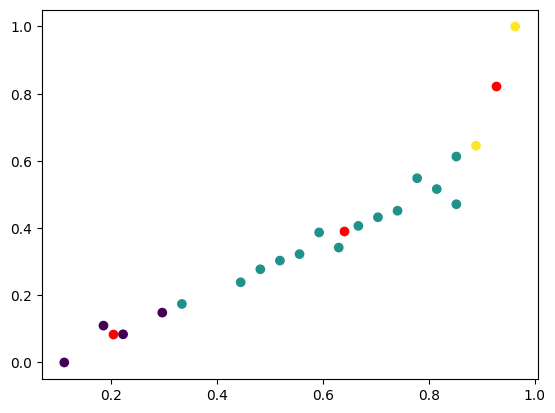

In [15]:
k = 3
centroids, labels = kmeans(x20, k)

plt.scatter(x20[:, 0], x20[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()


In [11]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def hierarchical_clustering(data, k):
    clusters = [[i] for i in range(len(data))]
    distances = {}

    history = []
    history.append(clusters)

    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            distances[(i, j)] = euclidean_distance(data[i], data[j])

    while len(clusters) > k:
        min_dist = float('inf')
        to_merge = None
        for (i, j), dist in distances.items():
            if dist < min_dist:
                min_dist = dist
                to_merge = (i, j)

        cluster1, cluster2 = to_merge
        new_cluster = clusters[cluster1] + clusters[cluster2]

        clusters = [c for idx, c in enumerate(clusters) if idx not in [cluster1, cluster2]]
        clusters.append(new_cluster)

        history.append(clusters)

        new_distances = {}
        for idx, cluster in enumerate(clusters):
            if idx != len(clusters) - 1:
                for other_idx, other_cluster in enumerate(clusters):
                    if idx < other_idx:
                        new_distances[(idx, other_idx)] = np.mean([
                            euclidean_distance(data[i], data[j])
                            for i in cluster
                            for j in other_cluster
                        ])

        distances = new_distances

    return history

def create_labels(data, clusters):
    labels = np.zeros(len(data), dtype=int)
    for cluster_idx, cluster in enumerate(clusters):
        for data_idx in cluster:
            labels[data_idx] = cluster_idx
    return labels


In [173]:
import numpy as np

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def hierarchical_clustering(data, k):
    clusters = [[i] for i in range(len(data))]
    distances = {}

    history = []
    history.append(clusters)

    # Calculate initial distances between all pairs of points
    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            distances[(i, j)] = euclidean_distance(data[i], data[j])

    print("Initial clusters:")
    print(clusters)
    print("Initial distances:")
    print(distances)
    print()

    while len(clusters) > k:
        # Find the pair of clusters with the smallest distance
        min_dist = float('inf')
        to_merge = None
        for (i, j), dist in distances.items():
            if dist < min_dist:
                min_dist = dist
                to_merge = (i, j)

        print(f"Pair to merge: {to_merge} with distance {min_dist}")

        # Merge the chosen clusters
        cluster1, cluster2 = to_merge
        new_cluster = clusters[cluster1] + clusters[cluster2]

        clusters = [c for idx, c in enumerate(clusters) if idx not in [cluster1, cluster2]]
        clusters.append(new_cluster)

        print(f"New clusters after merging:")
        print(clusters)
        print()

        history.append(clusters)

        # Calculate new distances between the new cluster and the remaining clusters
        new_distances = {}
        for idx, cluster in enumerate(clusters):
            if idx != len(clusters) - 1:
                for other_idx, other_cluster in enumerate(clusters):
                    if idx < other_idx:
                        new_distances[(idx, other_idx)] = np.mean([
                            euclidean_distance(data[i], data[j])
                            for i in cluster
                            for j in other_cluster
                        ])

        distances = new_distances
        print("Updated distances:")
        print(distances)
        print()

    return history

def create_labels(data, clusters):
    labels = np.zeros(len(data), dtype=int)
    for cluster_idx, cluster in enumerate(clusters):
        for data_idx in cluster:
            labels[data_idx] = cluster_idx
    return labels


In [174]:
# Use the original data for visualization
# original_x = df[['loan_status', 'income']].values
# original_x = df[['credit_score', 'income']].values

tree = hierarchical_clustering(x20, 1)
print(tree)

Initial clusters:
[[0], [1], [2], [3], [4]]
Initial distances:
{(0, 1): 0.20968215062040815, (0, 2): 0.6177931122962226, (0, 3): 0.2569670011316834, (0, 4): 0.07439135042321668, (1, 2): 0.40999197700048173, (1, 3): 0.4627479980371727, (1, 4): 0.1392121339622178, (2, 3): 0.8726901400531326, (2, 4): 0.5491713182880231, (3, 4): 0.32353723380690286}

Pair to merge: (0, 4) with distance 0.07439135042321668
New clusters after merging:
[[1], [2], [3], [0, 4]]

Updated distances:
{(0, 1): 0.40999197700048173, (0, 2): 0.4627479980371727, (0, 3): 0.17444714229131297, (1, 2): 0.8726901400531326, (1, 3): 0.5834822152921229, (2, 3): 0.29025211746929314}

Pair to merge: (0, 3) with distance 0.17444714229131297
New clusters after merging:
[[2], [3], [1, 0, 4]]

Updated distances:
{(0, 1): 0.8726901400531326, (0, 2): 0.5256521358615759, (1, 2): 0.347750744325253}

Pair to merge: (1, 2) with distance 0.347750744325253
New clusters after merging:
[[2], [3, 1, 0, 4]]

Updated distances:
{(0, 1): 0.612411

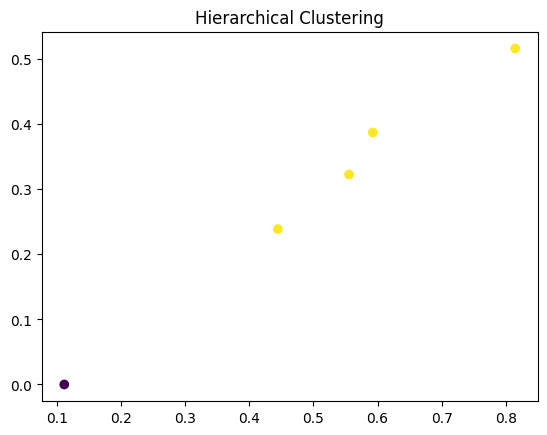

In [176]:
clusters = tree[-2]

labels = create_labels(x20, clusters)


# Visualization
plt.scatter(x20[:, 0], x20[:, 1], c=labels, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.show()